In [20]:
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다

### 엔트로피
### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>

In [ ]:
iris = load_iris()

In [6]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
model_Tree = DecisionTreeClassifier(criterion="entropy")
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2, random_state = 11, stratify=iris['target'])

In [11]:
## 학습
model_Tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
## graphviz 함수 호출
# (모델이름, out_file 파일생성, 라벨데이터 이름, feature_name 이름)
export_graphviz(model_Tree, out_file='tree.dot', class_names = iris['target_names'], feature_names = iris['feature_names'])

graphviz 사용

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/
- 경로 

os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\'

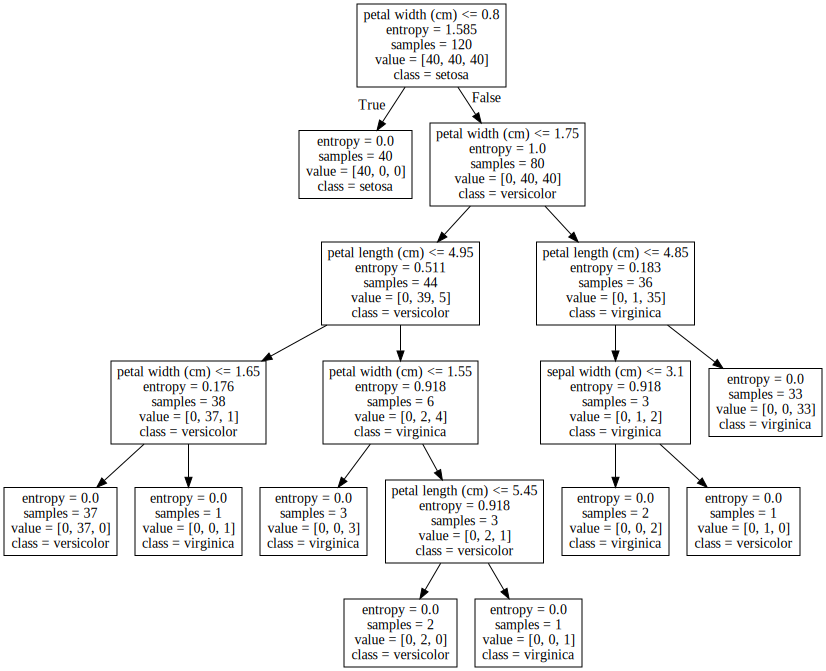

In [21]:
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [23]:
# 과적합이 발생할수도 있음
model_Tree.score(x_test, y_test)

1.0

In [25]:
model_Tree.score(x_train, y_train)

1.0

In [27]:
model_Tree.feature_importances_

array([0.        , 0.0144845 , 0.08878135, 0.89673415])

In [28]:
import seaborn as sns

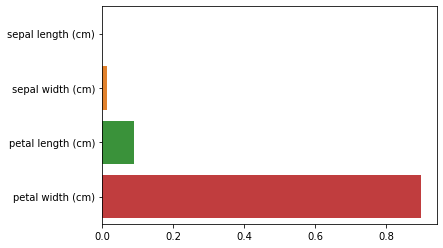

In [29]:
# 특성 데이터 중 분류를 가장 명확하게 해주는 특성데이터를 찾음
sns.barplot(x=model_Tree.feature_importances_, y=iris['feature_names'])
plt.show()

## 과적합 확인 (과소 또는 과대)

In [34]:
from sklearn.model_selection import validation_curve

In [32]:
pipe_tree = make_pipeline(DecisionTreeClassifier(criterion="entropy"))

In [37]:
param_range= [2,3,4,5,6,7,8,9,10]

In [49]:
# 반드시 파이프라인을 이용해서 확인
train_score,test_score = validation_curve(estimator=pipe_tree, X=x_train, y=y_train, param_name='decisiontreeclassifier__max_depth', 
                param_range=param_range, scoring='f1_macro',cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


In [44]:
# Param_range에 대한 값이 한행으로 표현
train_score

array([[0.94780197, 0.9582926 , 0.94759682, 0.9582926 , 0.95816993],
       [0.96874237, 0.9582926 , 0.96874237, 0.96868118, 0.95816993],
       [0.9791463 , 0.96868118, 0.98958079, 0.98958079, 0.9791463 ],
       [0.9791463 , 0.9791463 , 1.        , 1.        , 0.9791463 ],
       [1.        , 0.98958079, 1.        , 1.        , 0.98958079],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [51]:
# 각각에 대해 교차검증한 평균값
train_score.mean(axis=1)

array([0.95403079, 0.96452569, 0.98122707, 0.98748778, 0.99583232,
       1.        , 1.        , 1.        , 1.        ])

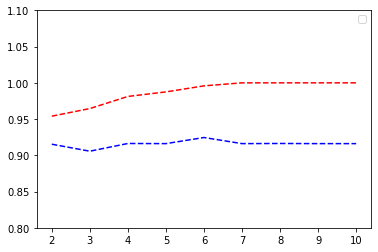

In [59]:
plt.ylim(0.8,1.1)
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.legend(train_score,test_score)
plt.show()

## 연습문제
- breat_cancel decisiontree validation curve를 그리시오

In [60]:
## 데이터 불러오기
cancer = load_breast_cancer()

In [61]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
# 모델 만들기
model_Tree = DecisionTreeClassifier(criterion="entropy")
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                    test_size = 0.2, random_state = 11, stratify=cancer['target'])

In [63]:
## 학습
model_Tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

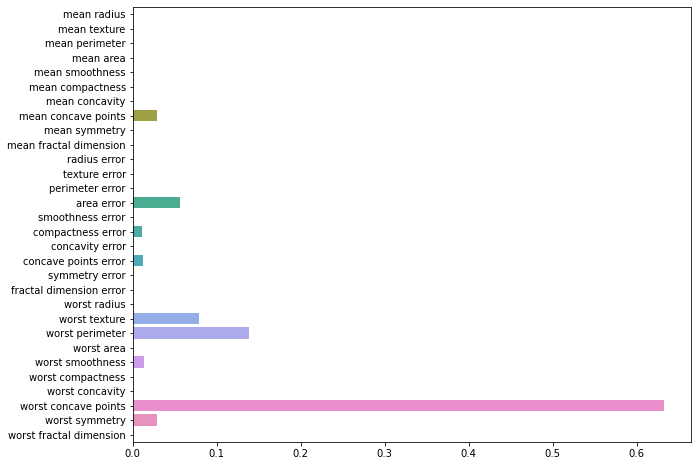

In [68]:
# 특성 데이터 중 분류를 가장 명확하게 해주는 특성데이터를 찾음
plt.figure(figsize=(10,8))
sns.barplot(x=model_Tree.feature_importances_, y=cancer['feature_names'])
plt.show()

In [70]:
pipe_tree = make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion="entropy"))

In [71]:
# 반드시 파이프라인을 이용해서 확인
train_score,test_score = validation_curve(estimator=pipe_tree, X=x_train, y=y_train, param_name='decisiontreeclassifier__max_depth', 
                param_range=param_range, scoring='f1_macro',cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


No handles with labels found to put in legend.


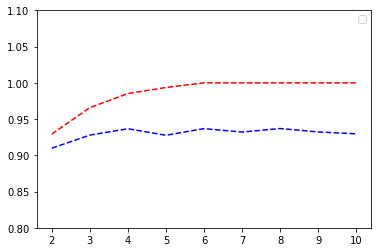

In [72]:
# 2번째 dept에서 가장 적은 차이를 확인할수 있음
plt.ylim(0.8,1.1)
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.legend()
plt.show()